## Gerak Bola Didalam Kotak
Yoyok Adisetio Laksono, 2025\
Departemen Fisika FMIPA UM\

Siapkan pustaka yang diperlukan

In [ ]:
#%matplotlib wx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

<b>Fungsi Animasi</b>\
Memindah setiap posisi per LANGKAH_WAKTU dan memeriksa apakah menabrak dinding? Jika ya maka arah kecepatan diubah (dinegasi).

In [33]:
def animasi(frame):
    global posisi, kecepatan
    # Memperbarui posisi partikel
    for i in range(JUMLAH_PARTIKEL):
        posisi[i] += kecepatan[i] * LANGKAH_WAKTU
        # Memeriksa tumbukan dengan dinding
        for d in range(2):
            if not RADIUS_PARTIKEL <= posisi[i, d] <= UKURAN_KOTAK - RADIUS_PARTIKEL:
                kecepatan[i, d] *= -1
                posisi[i, d] = np.clip(posisi[i, d], RADIUS_PARTIKEL, UKURAN_KOTAK - RADIUS_PARTIKEL)

    scat.set_offsets(posisi)
    scat.set_color(colors)
    ax.set_title(f'Frame: {frame}')
    return scat,

# Menutup jendela/menghentikan animasi dengan menekan tombol 'Esc'
def on_key(event):
    if event.key == 'escape':
        plt.close(fig)

Konstanta Fisika dan parameter simulasi

In [34]:
JUMLAH_PARTIKEL = 1
UKURAN_KOTAK = 100
RADIUS_PARTIKEL = 1
LANGKAH_WAKTU = 0.1

Inisialisasi posisi partikel secara acak

In [35]:
np.random.seed(42)  # untuk hasil acak yang dapat diulang
posisi = np.random.uniform(RADIUS_PARTIKEL, UKURAN_KOTAK - RADIUS_PARTIKEL, size=(JUMLAH_PARTIKEL,2))
kecepatan = np.random.normal(loc=0, scale=1, size=(JUMLAH_PARTIKEL,2))
print("Data posisi:")
print(posisi)
print("Data kecepatan:")
print(kecepatan)

Data posisi:
[[37.70493165 94.17000203]]
Data kecepatan:
[[0.64768854 1.52302986]]


Menyiapkan grafik tempat simulasi bola

In [36]:
fig, ax = plt.subplots(figsize=(6, 6))
colors = np.array(['blue'] * JUMLAH_PARTIKEL)
scat = ax.scatter(posisi[:, 0], posisi[:, 1], s=50, c=colors)
ax.set_xlim(0, UKURAN_KOTAK)
ax.set_ylim(0, UKURAN_KOTAK)
ax.set_aspect('equal')
fig.canvas.mpl_connect('key_press_event', on_key)

14

Animasi gerak bola

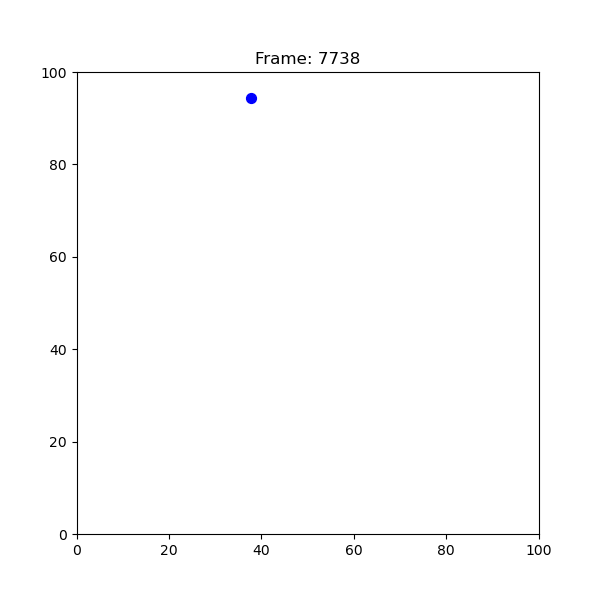

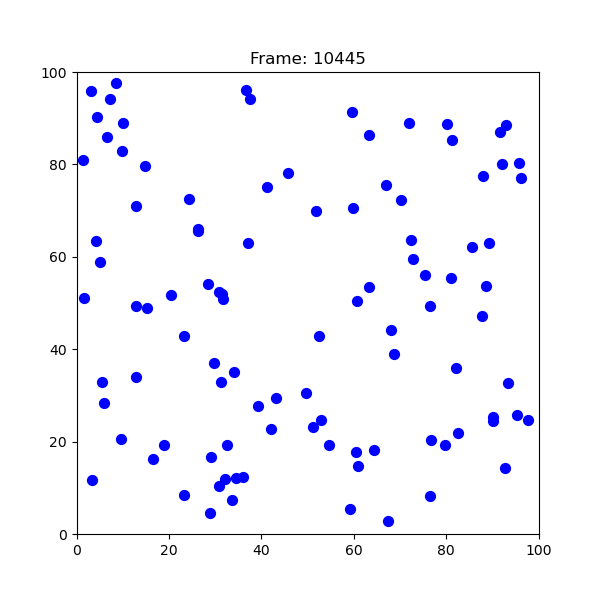

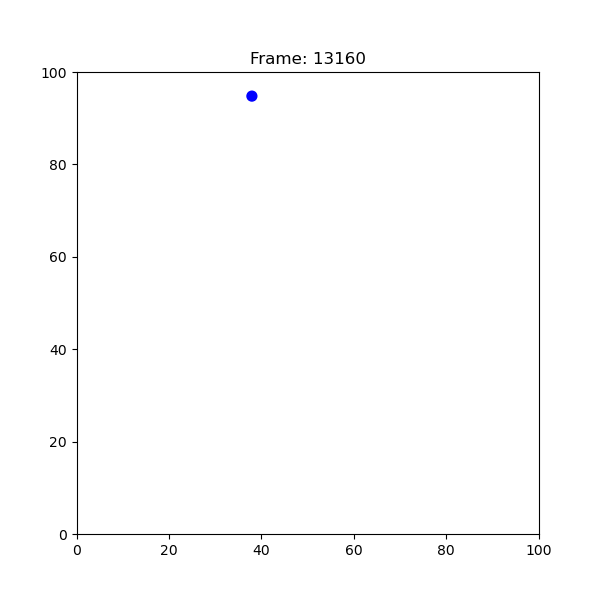

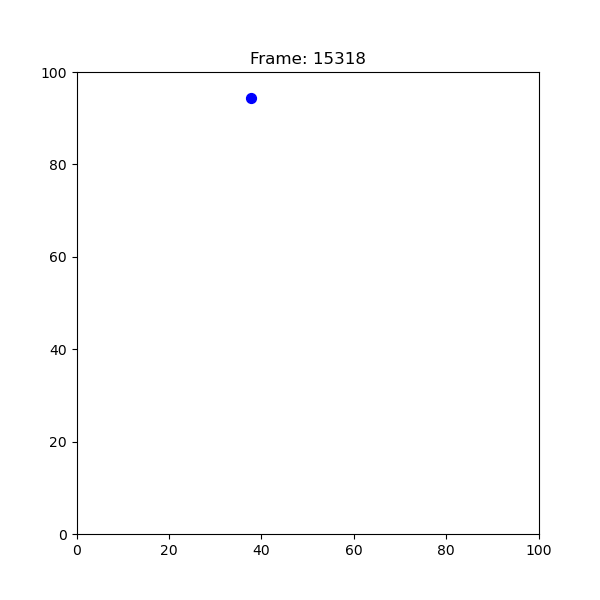

In [37]:
ani = FuncAnimation(fig, animasi, interval=1, frames=None, blit=True, repeat=False, cache_frame_data=False)
plt.show()